In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u
import warnings
from astropy.io import fits
import subprocess
import os
import photutils as phot
import matplotlib.patches as patches

# from astropy import image_registration
from image_registration import chi2_shift
from image_registration.fft_tools import shift

params = {
'xtick.direction': 'in',
'ytick.direction': 'in',
}
plt.rcParams.update(params)
plt.rc('figure', figsize=(8.0, 6.0))
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size':15})
plt.rc('text', usetex=True)
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format='retina'
path = 'ASTR257_2021/Project 4--Galaxy Rotation Curve/'

In [16]:
hdu_arc = fits.open(path+'arcs.fits')
hdu_arc[0].header

SIMPLE  =                    T / NORMAL FITS IMAGE                              
BITPIX  =                   16 / DATA PRECISION                                 
NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     
NAXIS1  =                 2112 / NUMBER OF COLUMNS                              
NAXIS2  =                  325 / NUMBER OF ROWS                                 
CRVAL1U =                    0 / COLUMN ORIGIN                                  
CRVAL2U =                 1249 / ROW ORIGIN                                     
CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        
CDELT2U =                   -1 / ROW CHANGE PER PIXEL                           
OBSNUM  =                 1014 / OBSERVATION NUMBER                             
IDNUM   =                    3 / IMAGE ID                                       
UGEOM   =                    6 / UCAM READOUT GEOMETRY                          
DGEOM   =                   

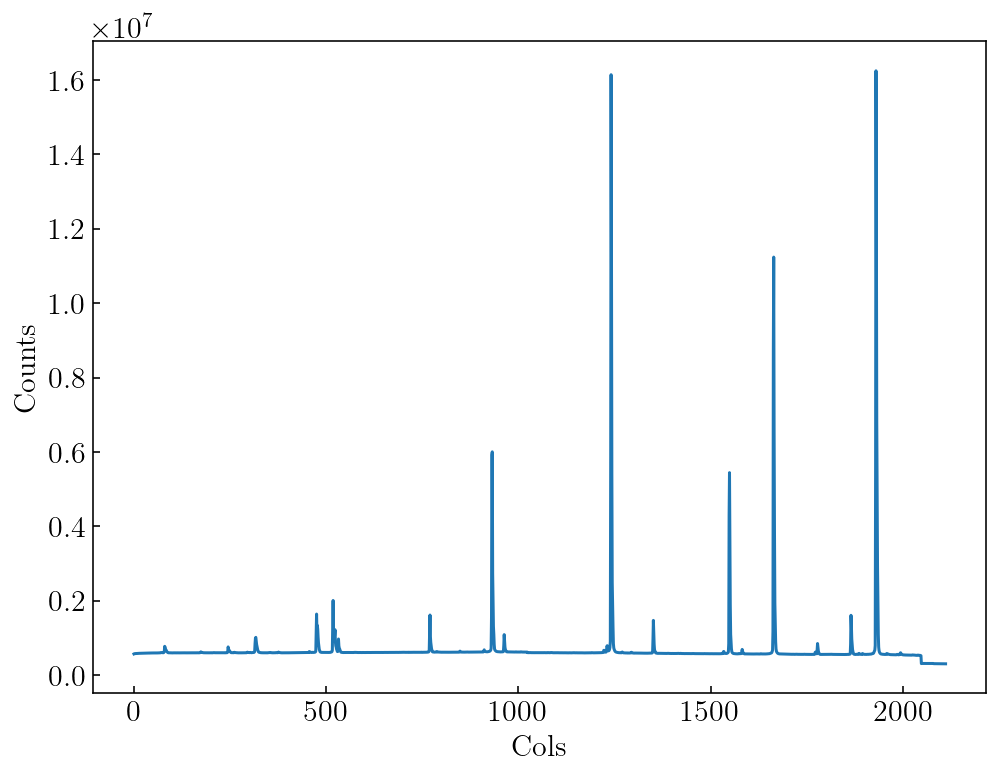

In [60]:
arcs = fits.getdata(path+'arcs.fits')
arcspec = np.sum(arcs,axis=0)
columns = np.arange(len(arcs[0,:]))

plt.plot(columns,arcspec)
plt.xlabel('Cols')
plt.ylabel('Counts')
plt.show()

Header tells us that it is the blue filter and this spectrum is visibly closest to the arc lamp. 
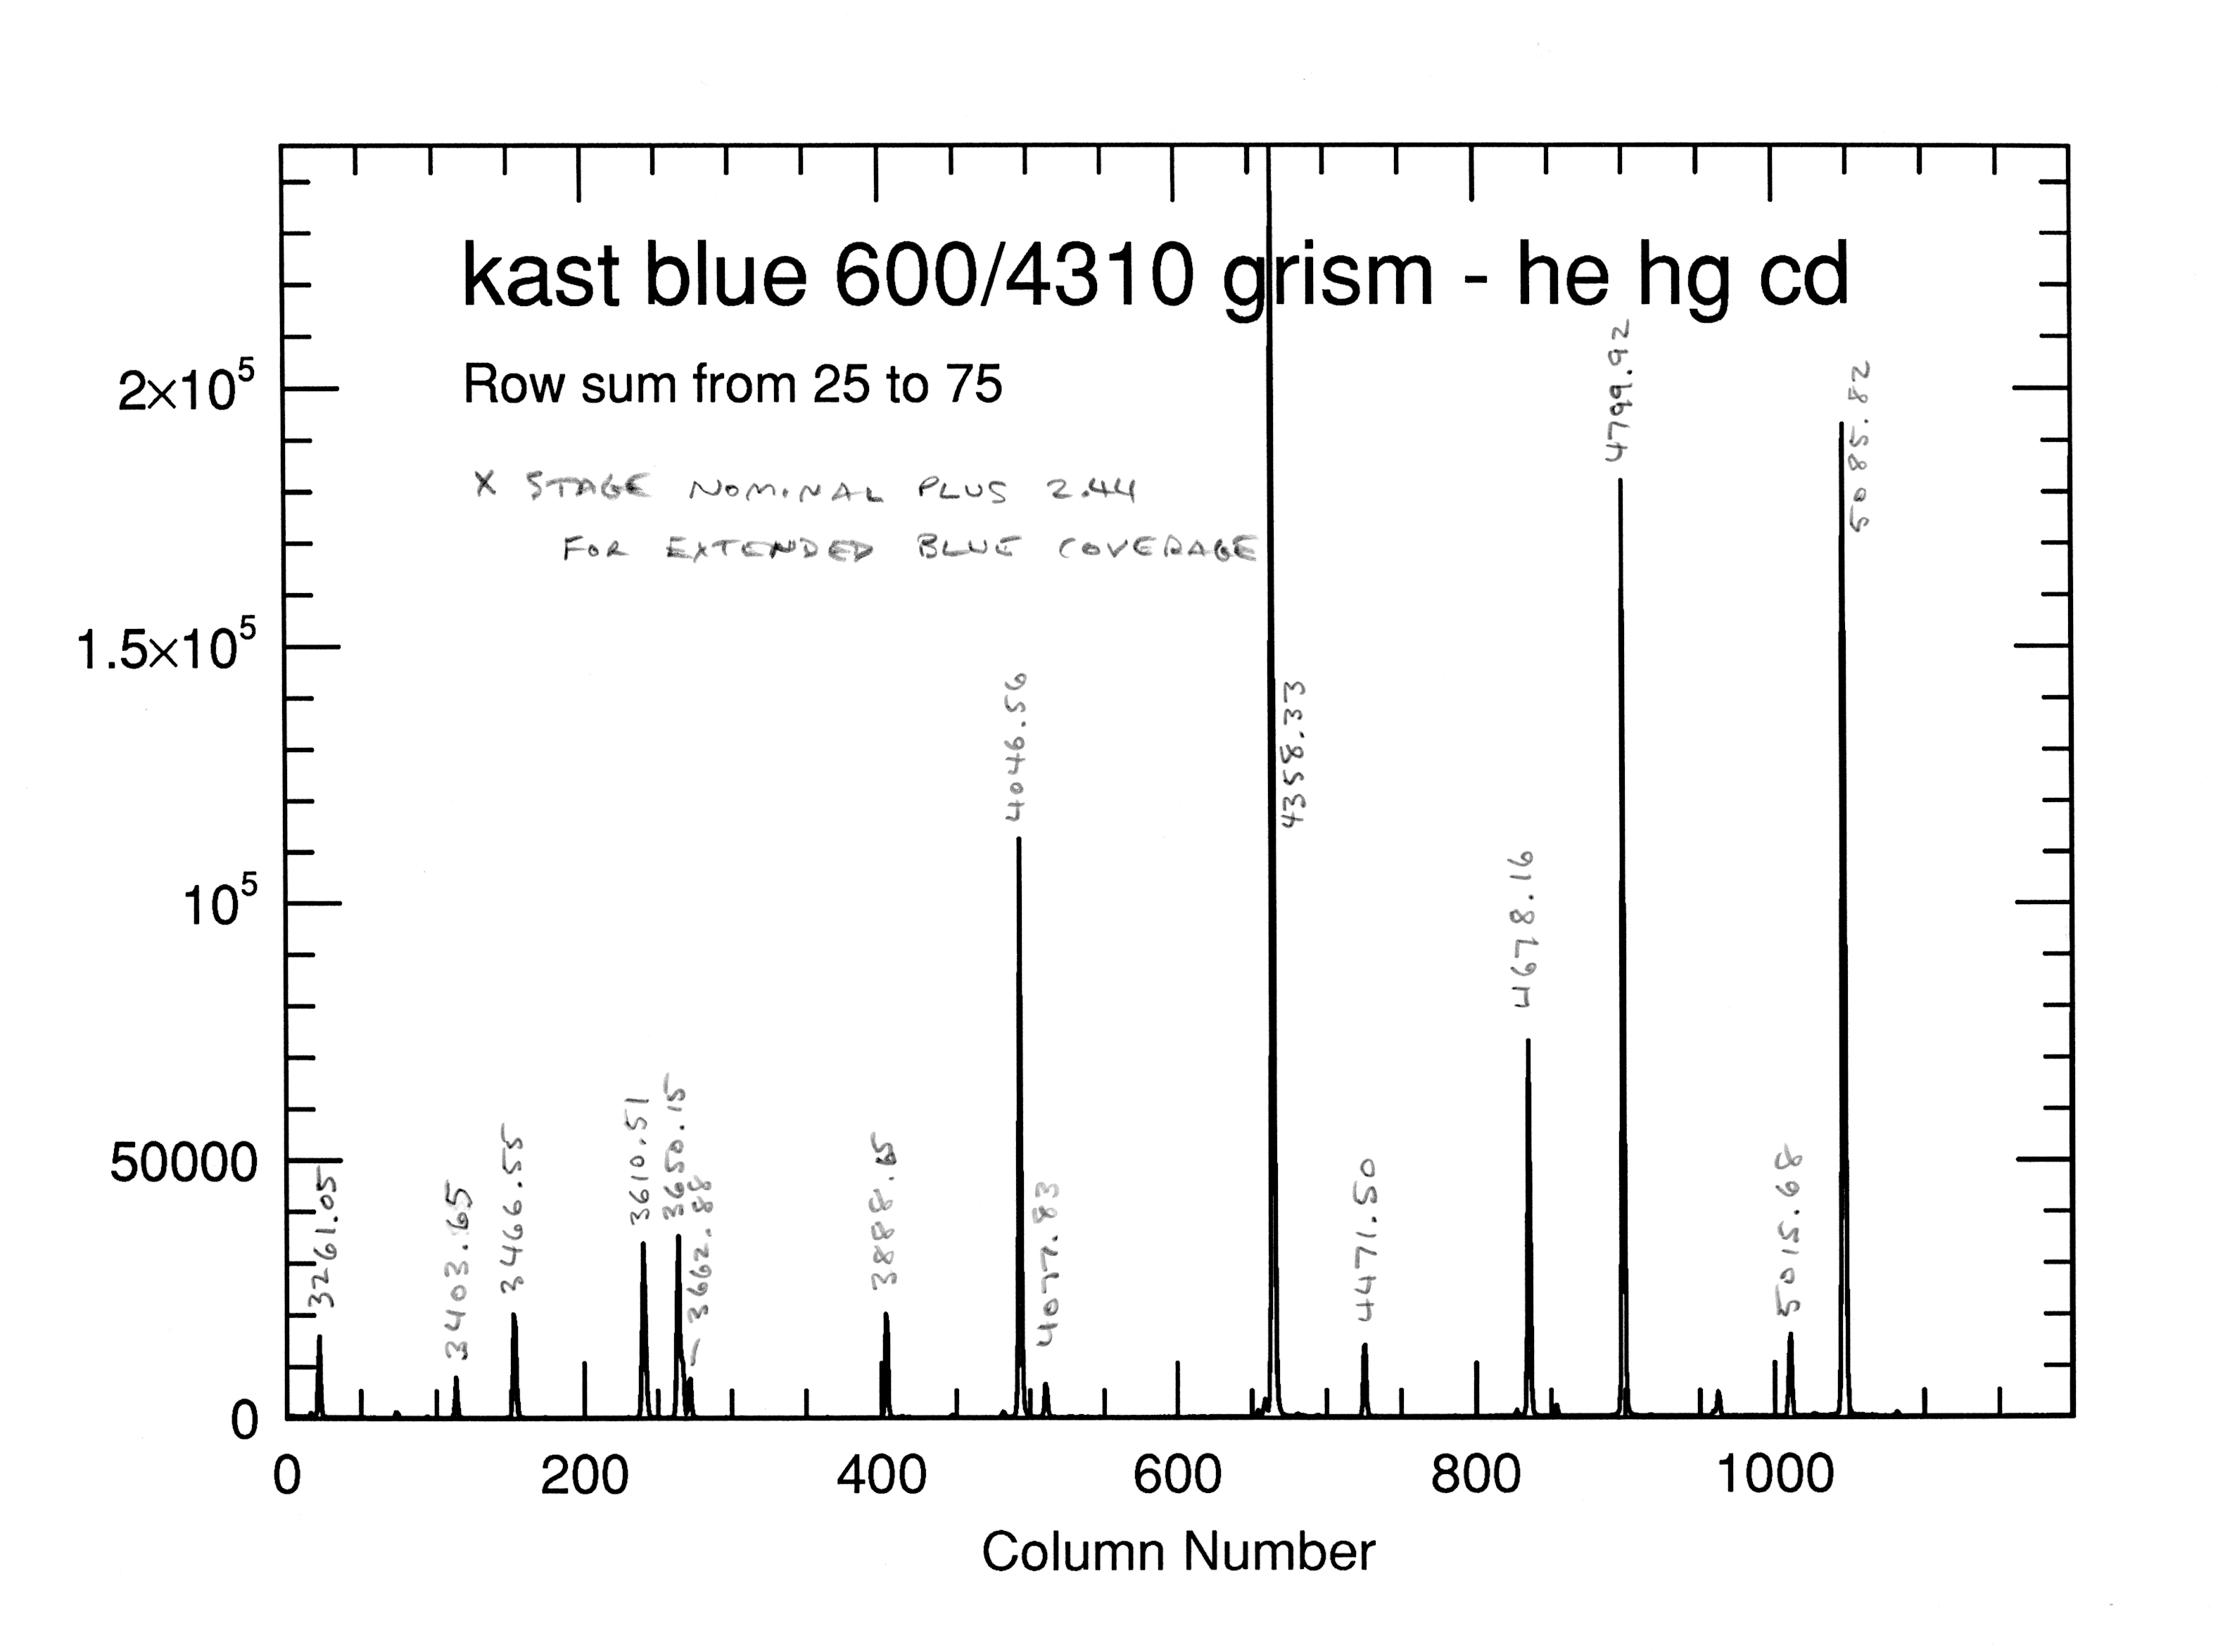

[16244066. 16139054. 11237408.  6003992.  5444475.]
[1930]
[1241]
[1664]
[932]
[1549]


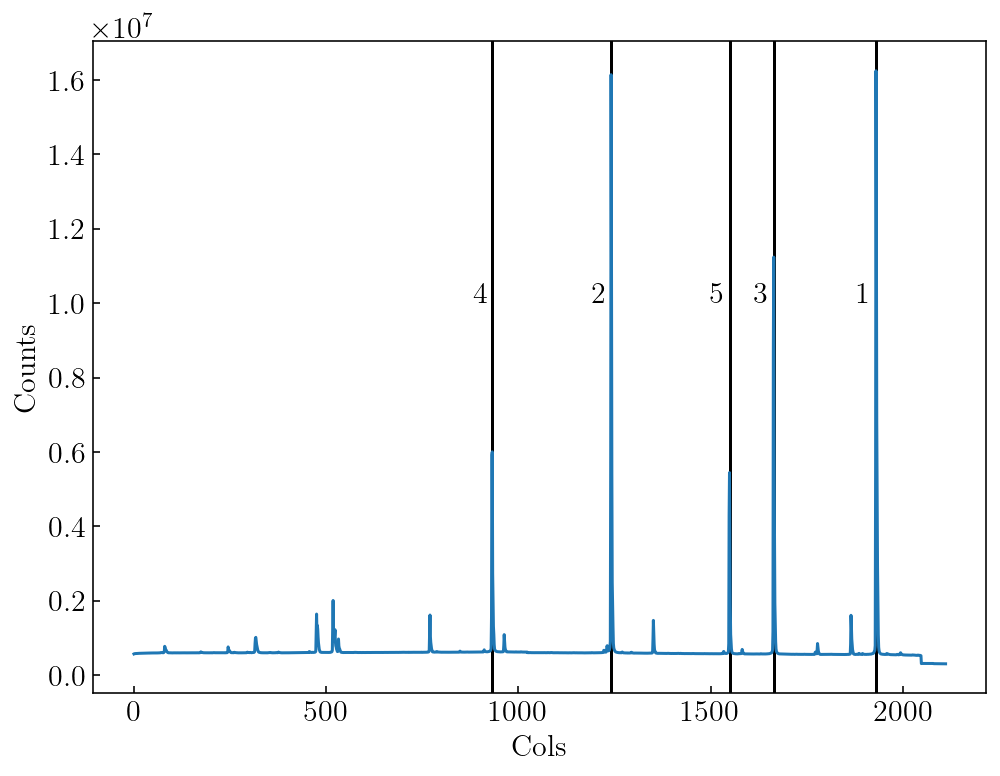

Error in each polynomial prefactor: [5.03115637e-07 1.43806475e-03 9.82431974e-01]


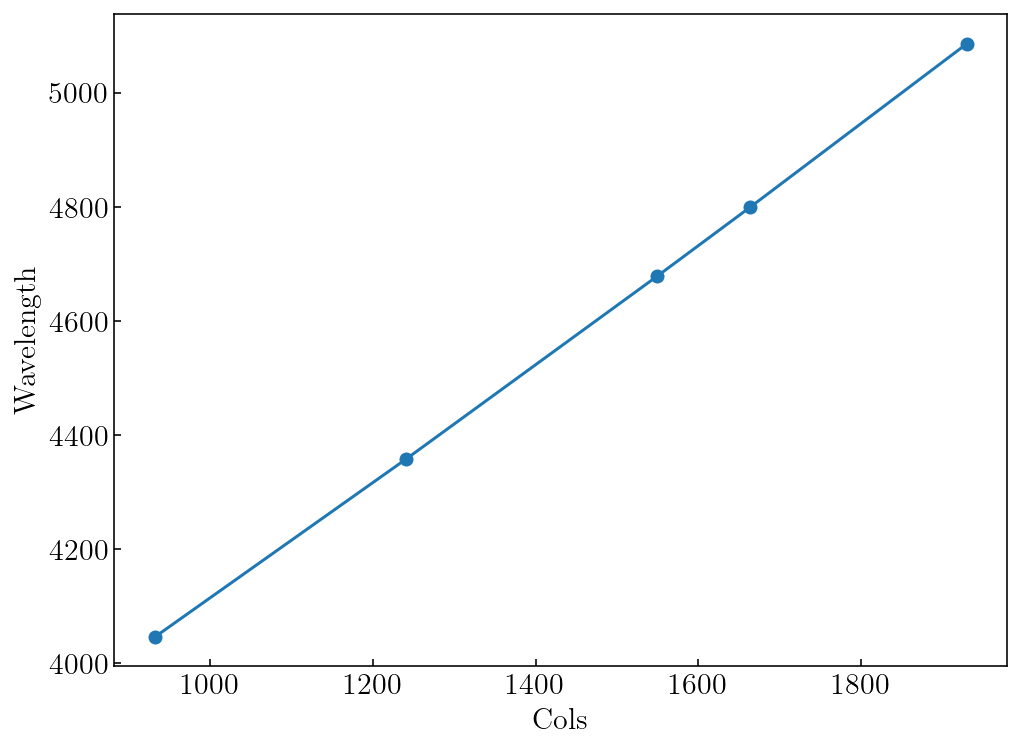

In [82]:
npeaks = 5
peak_finder = np.sum(fits.getdata(path+'arcs.fits'),axis=0)
peaks = np.zeros(npeaks)
for i in range(npeaks):
    peakmax = np.max(peak_finder)
    peaks[i] = peakmax
    peak_loc = np.where(peak_finder==peakmax)[0][0]
    peak_finder[peak_loc-20:peak_loc+20] = 0
       
print(peaks)
plt.plot(columns,arcspec,zorder=99)
peak_col = np.zeros_like(peaks)
for i in range(len(peaks)):
    p = columns[arcspec==peaks[i]]
    plt.axvline(p,c='k')
    plt.text(p-50,1e7,str(i+1))
    peak_col[i] = p
    print(p)
plt.xlabel('Cols')
plt.ylabel('Counts')
plt.show()

grism_peaks = [5085.82,4358.33,4799.92,4046.56,4678.16]

fit, cov = np.polyfit(peak_col,grism_peaks,2,cov=True)
print('Error in each polynomial prefactor:',np.diag(np.sqrt(cov)))
pix_to_wl = np.poly1d(fit)
plt.plot(np.sort(peak_col),pix_to_wl(np.sort(peak_col)))
plt.scatter(peak_col,grism_peaks)
plt.xlabel('Cols')
plt.ylabel('Wavelength')
plt.show()

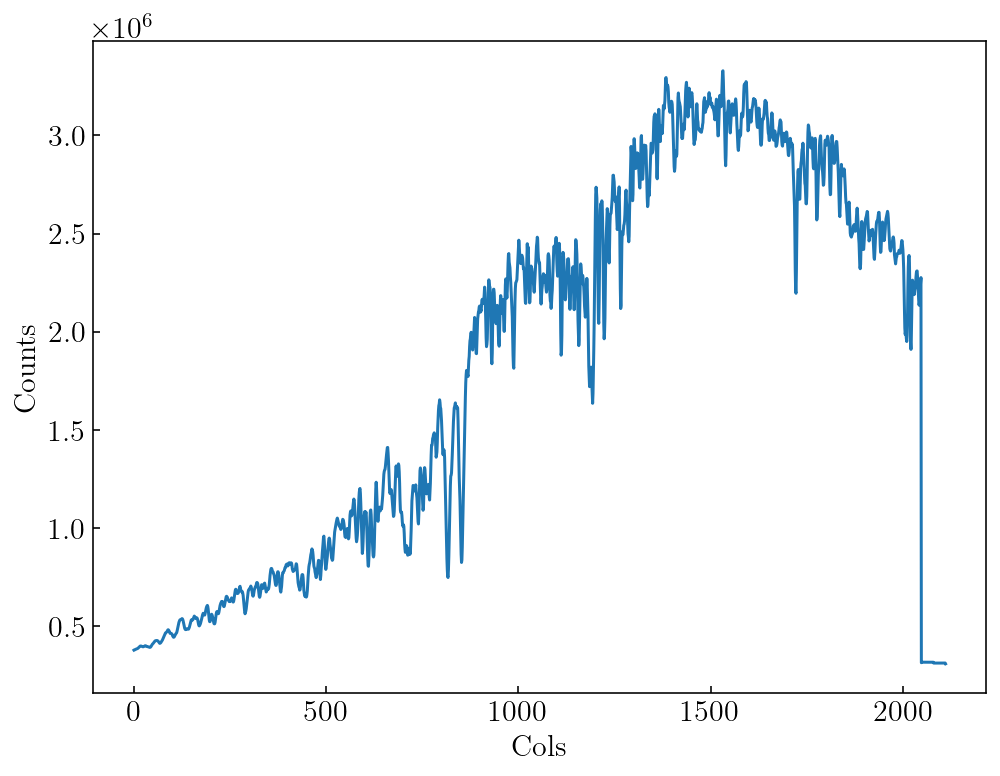

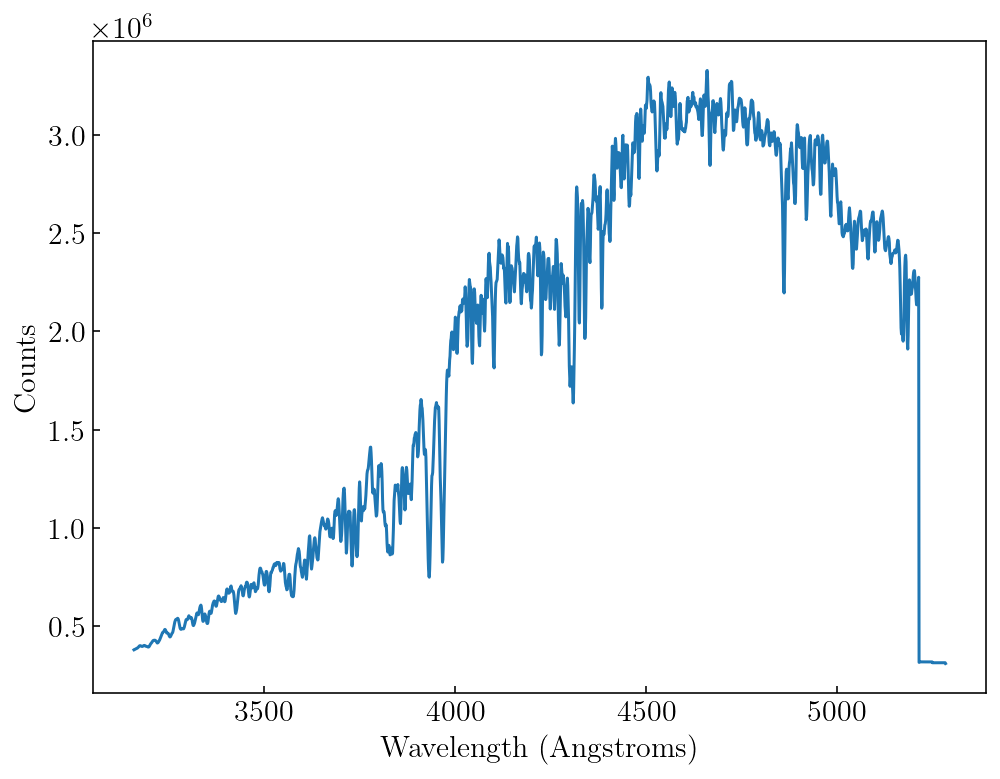

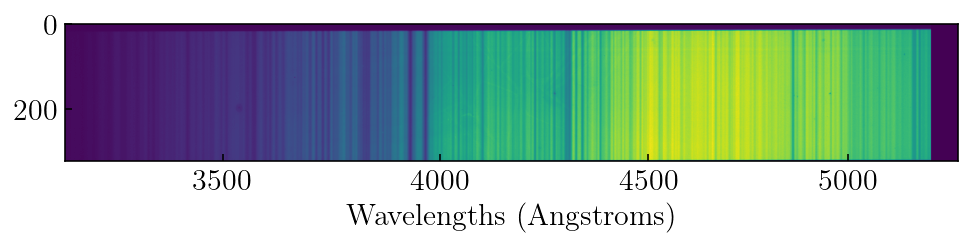

In [107]:
solarspec = np.sum(fits.getdata(path+'solar_spectrum.fits'),axis=0)

plt.plot(solarspec)
plt.xlabel('Cols')
plt.ylabel('Counts')
plt.show()

cols = np.arange(len(solarspec))
plt.plot(pix_to_wl(cols),solarspec)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Counts')
plt.show()

sp = fits.getdata(path+'solar_spectrum.fits')
wls = pix_to_wl(cols)

plt.imshow(sp)
fit, cov = np.polyfit(grism_peaks,peak_col,2,cov=True)
wl_to_pixel = np.poly1d(fit)
x = np.arange(3500,5500,500)
plt.xticks(np.round(wl_to_pixel(x)),x)
plt.xlabel('Wavelengths (Angstroms)')
plt.show()

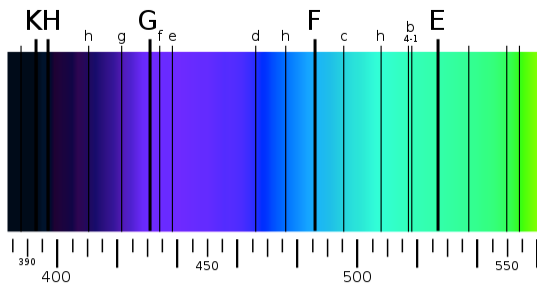

We might be seeing G and/ or Gf and Ge. The F line looks near 5000. The K and H are prominent to the left of 4000.